In [1]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
X, y = make_classification(n_samples=6000, n_features=3, n_informative=3,
                               n_redundant=0, n_repeated=0, n_classes=3,
                               n_clusters_per_class=1,
                               weights=[0.01, 0.04, 0.95],
                               class_sep=0.8, random_state=42)

In [4]:
from sklearn.model_selection import learning_curve


# A função plot_learning_curve desenha um gráfico com os dados da matriz.
def plot_learning_curve(estimator, X, y, cv=None):
    
    # O gráfico é inicializado com as características principais
    plt.figure()
    plt.title("Curva de Aprendizado")
    plt.xlabel('Pontos do treinamento')
    plt.ylabel('Desempenho')
    plt.grid()
    
    # Calculamos os valores da curva de aprendizado, acrescentando os dados de 10 em 10 %
    sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    points, score_in, score_out = learning_curve(estimator, X, y, train_sizes=sizes, cv=cv)
    
    # Tiramos a média e o desvio padrão de cada sequência de testes. 
    # Por padrão é feita validação cruzada em 3 conjuntos de dados.
    mean_in = np.mean(score_in, axis=1)
    std_in = np.std(score_in, axis=1)
    mean_out = np.mean(score_out, axis=1)
    std_out = np.std(score_out, axis=1)
    
    # O desempenho de treinamento fica em vermelho e o de validação em verde
    plt.plot(points, mean_in, 'o-', color='red', label='Treinamento')
    plt.plot(points, mean_out, 'o-', color='green', label='Teste')
    
    # Os desvios ficam ao redor das linhas para indicar a variação no aprendizado
    plt.fill_between(points, mean_in - std_in,
                     mean_in + std_in, color='red', alpha=0.1)
    plt.fill_between(points, mean_out - std_out,
                     mean_out + std_out, color='green', alpha=0.1)
    
    plt.legend()
    return plt

In [5]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

<module 'matplotlib.pyplot' from '/home/rlfo/.local/share/virtualenvs/imbalanced-C0cY1Byo/lib/python3.6/site-packages/matplotlib/pyplot.py'>

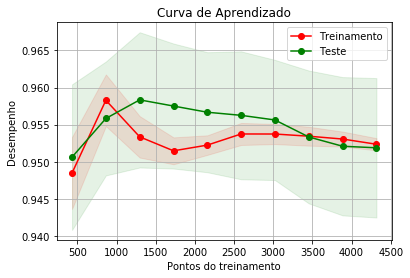

In [7]:
naive_bayes = GaussianNB()
plot_learning_curve(naive_bayes, X_train, y_train, cv=10)

Confusion matrix, without normalization
[[   0    1   13]
 [   0   44   16]
 [   0   36 1090]]


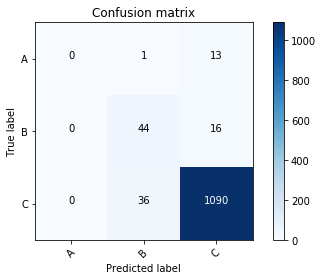

In [8]:
from sklearn.metrics import confusion_matrix

naive_bayes.fit(X_train, y_train)
pred = naive_bayes.predict(X_test)
matrix = confusion_matrix(y_pred=pred, y_true=y_test)
plot_confusion_matrix(matrix, ['A', 'B', 'C'])

In [9]:
print(classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.54      0.73      0.62        60
           2       0.97      0.97      0.97      1126

   micro avg       0.94      0.94      0.94      1200
   macro avg       0.51      0.57      0.53      1200
weighted avg       0.94      0.94      0.94      1200



/home/rlfo/.local/share/virtualenvs/imbalanced-C0cY1Byo/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

<module 'matplotlib.pyplot' from '/home/rlfo/.local/share/virtualenvs/imbalanced-C0cY1Byo/lib/python3.6/site-packages/matplotlib/pyplot.py'>

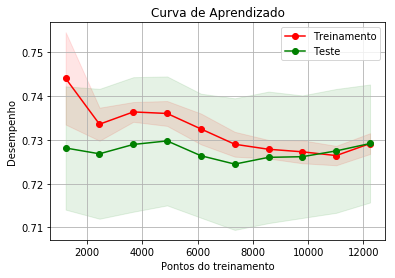

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.2)
naive_bayes = GaussianNB()
plot_learning_curve(naive_bayes, X_train, y_train, cv=10)

Confusion matrix, without normalization
[[692 219 226]
 [150 937  59]
 [180  50 888]]


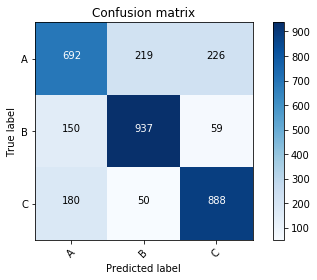

In [12]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
pred = naive_bayes.predict(X_test)
matrix = confusion_matrix(y_pred=pred, y_true=y_test)
plot_confusion_matrix(matrix, ['A', 'B', 'C'])

In [13]:
print(classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.68      0.61      0.64      1137
           1       0.78      0.82      0.80      1146
           2       0.76      0.79      0.78      1118

   micro avg       0.74      0.74      0.74      3401
   macro avg       0.74      0.74      0.74      3401
weighted avg       0.74      0.74      0.74      3401



In [14]:
# Under sampling
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0)
naive_bayes = GaussianNB()
X_resampled, y_resampled = ros.fit_resample(X, y)

<module 'matplotlib.pyplot' from '/home/rlfo/.local/share/virtualenvs/imbalanced-C0cY1Byo/lib/python3.6/site-packages/matplotlib/pyplot.py'>

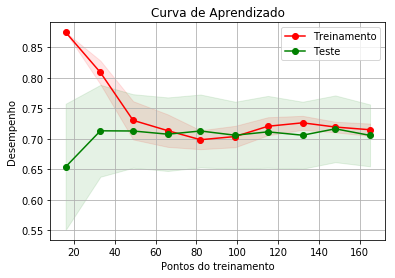

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.2)
plot_learning_curve(naive_bayes, X_train, y_train, cv=10)

Confusion matrix, without normalization
[[ 9  2  7]
 [ 2 15  1]
 [ 2  0  9]]


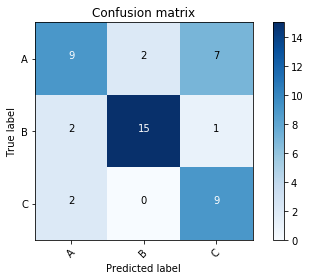

In [16]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
pred = naive_bayes.predict(X_test)
matrix = confusion_matrix(y_pred=pred, y_true=y_test)
plot_confusion_matrix(matrix, ['A', 'B', 'C'])

In [17]:
print(classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58        18
           1       0.88      0.83      0.86        18
           2       0.53      0.82      0.64        11

   micro avg       0.70      0.70      0.70        47
   macro avg       0.70      0.72      0.69        47
weighted avg       0.73      0.70      0.70        47



In [18]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

<module 'matplotlib.pyplot' from '/home/rlfo/.local/share/virtualenvs/imbalanced-C0cY1Byo/lib/python3.6/site-packages/matplotlib/pyplot.py'>

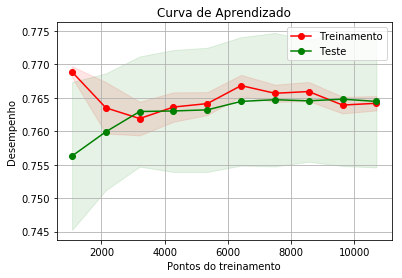

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.2)
naive_bayes = GaussianNB()
plot_learning_curve(naive_bayes, X_train, y_train, cv=10)

In [20]:
print(sorted(Counter(y_resampled).items()))

[(0, 5091), (1, 5324), (2, 4451)]


Confusion matrix, without normalization
[[720 160 142]
 [177 888  15]
 [162  48 662]]


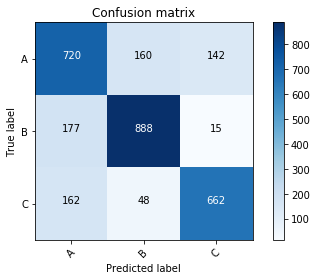

In [21]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
pred = naive_bayes.predict(X_test)
matrix = confusion_matrix(y_pred=pred, y_true=y_test)
plot_confusion_matrix(matrix, ['A', 'B', 'C'])

In [22]:
print(classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1022
           1       0.81      0.82      0.82      1080
           2       0.81      0.76      0.78       872

   micro avg       0.76      0.76      0.76      2974
   macro avg       0.77      0.76      0.76      2974
weighted avg       0.76      0.76      0.76      2974



In [49]:
from imblearn.under_sampling import CondensedNearestNeighbour 
smote_tomek = CondensedNearestNeighbour(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

<module 'matplotlib.pyplot' from '/home/rlfo/.local/share/virtualenvs/imbalanced-C0cY1Byo/lib/python3.6/site-packages/matplotlib/pyplot.py'>

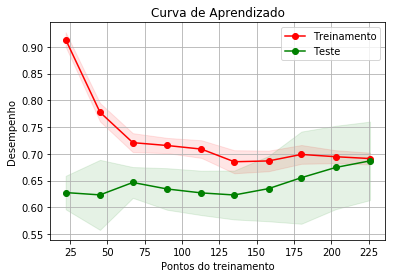

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.2)
naive_bayes = GaussianNB()
plot_learning_curve(naive_bayes, X_train, y_train, cv=10)

In [25]:
print(sorted(Counter(y_resampled).items()))

[(0, 77), (1, 188), (2, 5583)]


Confusion matrix, without normalization
[[ 2  2  8]
 [ 4 12  6]
 [ 3  1 25]]


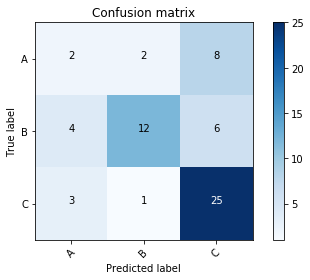

In [51]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
pred = naive_bayes.predict(X_test)
matrix = confusion_matrix(y_pred=pred, y_true=y_test)
plot_confusion_matrix(matrix, ['A', 'B', 'C'])

In [52]:
print(classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.22      0.17      0.19        12
           1       0.80      0.55      0.65        22
           2       0.64      0.86      0.74        29

   micro avg       0.62      0.62      0.62        63
   macro avg       0.55      0.52      0.52        63
weighted avg       0.62      0.62      0.60        63

